In [1]:
from keras.models import load_model
import os
from os import listdir
from os.path import isdir
from PIL import Image
from numpy import asarray
from numpy import savez_compressed
from matplotlib import pyplot
import mtcnn
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [2]:
model = load_model('facenet_keras.h5')
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    detector =  MTCNN()
    results = detector.detect_faces(pixels)
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)
15 (160, 160, 3)


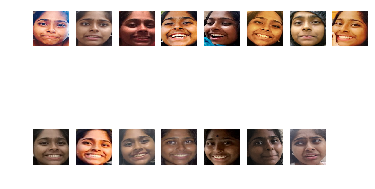

In [4]:
folder = '6-classes/train/Shambhavi'
i = 1
for filename in listdir(folder):
   path = folder+'/'+filename
   if path.endswith('.DS_Store'):
     continue
   face = extract_face(path)
   print(i, face.shape)
   pyplot.subplot(2, 8, i)
   pyplot.axis('off')
   pyplot.imshow(face)
   i += 1
pyplot.show()

In [5]:
#for EACH DIRECTORY SPECIFIED
def load_faces(directory):
    faces = list()
    for filename in listdir(directory):
        path = directory+'/'+filename
        if path.endswith('.DS_Store'):
             continue
        face = extract_face(path)
        faces.append(face)
    return faces

In [6]:
# #FOR DETECTING FACES WITH EITHER TRAIN OR VAL
def load_dataset(directory):
    X, y = list(), list()
    for subdir in listdir(directory):
        path = directory+ '/'+subdir + '/'
        if not os.path.isdir(path):
            continue
        faces = load_faces(path)
        labels = [subdir for _ in range(len(faces))]
        print('>loaded %d examples for class: %s' %(len(faces), subdir))
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

In [7]:
# load train dataset
trainX, trainy = load_dataset('6-classes/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('6-classes/val/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('6-classes.npz', trainX, trainy, testX, testy)

>loaded 15 examples for class: Shambhavi
>loaded 21 examples for class: Saransh
>loaded 19 examples for class: Paati
>loaded 17 examples for class: Thatha
>loaded 23 examples for class: Dharini
>loaded 14 examples for class: Appa
(109, 160, 160, 3) (109,)
>loaded 10 examples for class: Shambhavi
>loaded 5 examples for class: Saransh
>loaded 5 examples for class: Paati
>loaded 5 examples for class: Thatha
>loaded 5 examples for class: Dharini
>loaded 5 examples for class: Appa
(35, 160, 160, 3) (35,)
